## Import

In [12]:
!pip install -r requirements.txt

    100% |████████████████████████████████| 8.0MB 1.6MB/s 
    100% |████████████████████████████████| 27.3MB 831kB/s 


In [9]:
# Matplotlib
import matplotlib.pyplot as plt
# Tensorflow
import tensorflow as tf
# Numpy and Pandas
import numpy as np
import pandas as pd
# Ohter import
import sys

## Be sure to used Tensorflow 2.0

In [10]:
assert hasattr(tf, "function") # Be sure to use tensorflow 2.0

## Load the dataset: Fashion MNIST

![](https://storage.googleapis.com/kaggle-datasets-images/2243/3791/9384af51de8baa77f6320901f53bd26b/dataset-cover.png)

In [13]:
from sklearn.preprocessing import StandardScaler

# Fashio MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(images, targets), (images_test, targets_test) = fashion_mnist.load_data()

# Get only a subpart of the dataset
images = images[:10000]
targets = targets [:10000]

# Reshape the dataset and convert to float
images = images.reshape(-1, 784)
images = images.astype(float)
images_test = images_test.reshape(-1, 784)
images_test = images_test.astype(float)

scaler = StandardScaler()
images = scaler.fit_transform(images)
images_test = scaler.transform(images_test)

print(images.shape)
print(targets.shape)

4423680/4422102 [==============================] - 1s 0us/step
(10000, 784)
(10000,)


## Plot one of the data

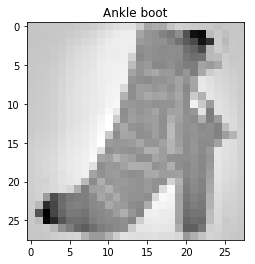

In [15]:
targets_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", 
                 "Shirt", "Sneaker", "Bag", "Ankle boot"
]
# Plot one image
plt.imshow(np.reshape(images[11], (28, 28)), cmap="binary")
plt.title(targets_names[targets[11]])
plt.show()

# Create the model
![](images/simple_nn.png)

# Create the model

In [16]:
# Flatten
model = tf.keras.models.Sequential()

# Add the layers
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model_output = model.predict(images[0:1])
print(model_output, targets[0:1])

[[0.10294472 0.05798411 0.06153525 0.10487442 0.22326398 0.14528519
  0.02729159 0.06266852 0.0979266  0.11622563]] [9]


## Model Summary

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  200960    
_________________________________________________________________
dense_1 (Dense)              multiple                  32896     
_________________________________________________________________
dense_2 (Dense)              multiple                  1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


## Compile the model

In [18]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

## Train the model

In [19]:
history = model.fit(images, targets, epochs=10, validation_split=0.2)

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s 107us/sample - loss: 1.6753 - accuracy: 0.4807 - val_loss: 1.2556 - val_accuracy: 0.6365
Epoch 2/10
8000/8000 [==============================] - 1s 68us/sample - loss: 1.0743 - accuracy: 0.6870 - val_loss: 0.9772 - val_accuracy: 0.7005
Epoch 3/10
8000/8000 [==============================] - 1s 66us/sample - loss: 0.8828 - accuracy: 0.7286 - val_loss: 0.8523 - val_accuracy: 0.7255
Epoch 4/10
8000/8000 [==============================] - 1s 66us/sample - loss: 0.7834 - accuracy: 0.7504 - val_loss: 0.7768 - val_accuracy: 0.7500
Epoch 5/10
8000/8000 [==============================] - 1s 69us/sample - loss: 0.7198 - accuracy: 0.7666 - val_loss: 0.7270 - val_accuracy: 0.7580
Epoch 6/10
8000/8000 [==============================] - 1s 67us/sample - loss: 0.6740 - accuracy: 0.7796 - val_loss: 0.6905 - val_accuracy: 0.7635
Epoch 7/10
8000/8000 [==============================] - 1s 69us/sampl

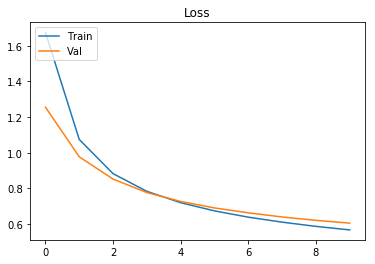

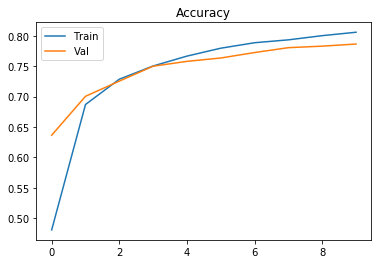

In [20]:
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_accuracy"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

In [21]:
loss, acc = model.evaluate(images_test, targets_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

10000/10000 [==============================] - 0s 33us/sample - loss: 0.6190 - accuracy: 0.7881
Test Loss 0.6190300011634826
Test Accuracy 0.7881
